Anexo G

# Caracterizador

#### Elaborado por: Ricardo Niño de Rivera Barrón

#### Ingeniería Biónica

#### Trabajo Terminal II

En esta libreta interactiva de python 3.8 se describe el funcionamiento del caracterizador propiesto para este trabajo.

Para este trabajo el caracterizador consiste en dos partes. La primera parte encuentra diez (10) parámetros estadísticos que describen la función de probabilidad de la intensidad de los pixeles de la imagen. La segunnda parte consiste en hallar siete (7) descriptores estadísticos de segundo orden (o de Haralick) los cuales se extraen de la matriz de co-ocurrencia de la imagen.

La matriz de co-ocurrencia representa la cantidad de pixeles vecinos que los pixeles de cierto valor determinado tiene a una distancia y dirección también determinadas. Para este trabajo la distancia es un pixel y la dirección 0 grados.

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix
import os
import scipy

In [2]:
#Leemos los archivos en el directorio de interés
files=os.listdir("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy")

In [3]:
#Imprimimos los pirmeros 8 archivos
counter=0
for i in files:
    
    print(i)
    counter
    counter+=1
    
    if counter==8:
        break

T0001.1.1.D.2016-10-08.00_D.npy
T0001.1.1.D.2016-10-08.00_I.npy
T0001.1.1.D.2016-10-08.01_D.npy
T0001.1.1.D.2016-10-08.01_I.npy
T0001.1.1.D.2016-10-08.02_D.npy
T0001.1.1.D.2016-10-08.02_I.npy
T0001.1.1.D.2016-10-08.03_D.npy
T0001.1.1.D.2016-10-08.03_I.npy


Como es posible observar los archivos están ordenados según la numeración del paciente y aparece primero la imagen del lado derecho y posteriormente la del lado izquierdo.

Con base en esta información se elegirán los primeros archivos para ejemplificar el proceso que describe esta libreta.

In [4]:
derecha=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy\\"+files[0])
izquierda=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy\\"+files[1])

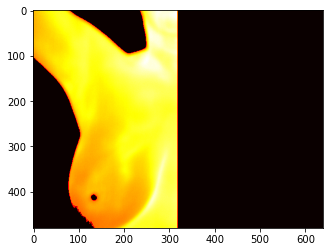

In [5]:
#Desplegando imagen del lado derecho
plt.imshow(derecha, cmap="hot")

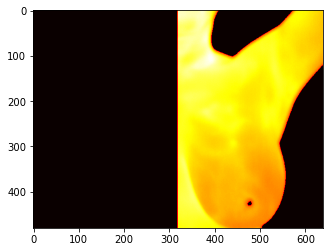

In [6]:
#Desplegando imagen del lado izquierdo
plt.imshow(izquierda, cmap="hot")

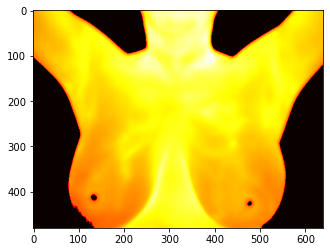

In [7]:
#Desplegando la suma de estas dos imágenes
plt.imshow(derecha+izquierda, cmap="hot")

Antes de comenzar se aclara que las características finales obtenidas es la diferencia absoluta de los descriptores del lado izquierdo y derecho.

## Descriptores de primer orden

Estos descriptores son obtenidos a partir del histograma o, propiamente dicho, a la función de probabilidad de la intensidad de los pixeles de la imagen.

Los descriptores que se obtendrán son:

<ol>
    <li>Media: es el valor promedio del pixel, o el valor esperado.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/1_media.png">
    <p></p>
    <li>Desviación estándar: es la desviación cuadrática promedio de los valores de cada uno de los pixeles con repsecto a la media.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/2_desviacion_estandar.png">
    <p></p>
    <li>Asimetría: se refiere al sesgo de la distribución, si este parámetro es cero no existe sesgo, si es positiva es sesgada a la izquierda y si es negativa es sesgada a la derecha. La definición matemática es la de Fisher.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/3_asimetria.png">
    <p></p>
    <li>Curtosis: se refiere a la cantidad de valores alejados o "outliers", si la curtosis es mayor que cero estos aumentarán y el centro de la distribución tenderá a una forma "puntiaguda" o leptocurtica, si la curtosis es menor a cero la distribución es plana o platicurtica. Estas conclusiones son con respecto a la distribución "estandarizada", es decir, su aproximación a la normal con media y mediana iguales a cero. La definición matemática utilizada es la de Fisher.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/4_curtosis.png">
    <p></p>
    <li>Energía: este descriptor es la potencia cudrática de la función de probabilidad con el fin de aumentar o contrastar la separación entre los valores grandes y pequeños, ya que los valores grandes tendrán potencias mucho más grandes que los valores pequeños. Esta idea propiamente es aplicada al contraste en imágenes pero aquí se utiliza como un descriptor más para la asimetría. No está de más mencionar que mietras mayor sea este parámetro mayor será la probabilidad de encontrar valores mayores de pixel.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/5_energia.png">
    <p></p>
    <li>Entropía: este descriptor indica la "sorpresa esperada". Para una distribución uniforme (con la misma probabilidad de ocurrencia para cualquier salida y que para este caso es cualuier valor entre 0 a 255) la entropía será 1, es decir, la "incertidumbre de sorpresa" será la mayor posible (porque no existe mayor certidumbre de que un valor salga sobre otro). Si por el contrario existe un valor de pixel el cual tenga mayor probabilidad de ocurrencia que los demás (caso que con seguridad ocurrirá en este problema), la entropía será menor a 1 (porque existe un valor o conjuntos de valores que son más probables aparezcan con respecto a otros). El otro caso extremo es una entropía de cero, que ocurre cuando sólo existe un valor con una probabilidad de ocurrencia de 1, ste caso ocurre cuando todos los valores de los pixeles de la imagen son los iguales.</li>
    <img src="Ecuaciones_Descriptores/Primer_orden/6_entropia.png">
    <p></p>
    <li>Moda: es el valor que más se repite en la imagen, por tanto no necesariamente se obtiene del histograma.</li>
    <p></p>
    <li>Mediana: es el valor que se encuentra justo a la mitad de todos los demás valores de la imagen. Al igual que el anterior no es necesario que se obtenga a partir del histograma.</li>
    <p></p>
    <li>Máximo: es el pixel de mayor valor que aparece en la imagen (este valor no es necesariamente obtenido del histograma).</li>
    <p></p>
    <li>Rango: es la distanccia entre el valor máximo y el valor mínimo que aparecen en la imagen (este valo no necesariamente es obtenido del histograma).</li>
</ol>

Donde <em>i</em> es el valor iésimo del pixel de la imagen y <em>p(i)</em> es la función de probabilidad de ocurrencia de los valores posibles de algún pixel. 

In [8]:
# "Aplanamos" las imágenes

# Imagen derecha
flatten_image_der = derecha.flatten()

#Imagen izquierda
flatten_image_izq = izquierda.flatten()

In [9]:
np.where(flatten_image_der==0)[0]

array([    80,     81,     82, ..., 307197, 307198, 307199], dtype=int32)

In [10]:
# Ahora eliminamos los ceros de las imágenes
flatten_image_der = np.delete(flatten_image_der, np.where(flatten_image_der==0)[0])
flatten_image_izq = np.delete(flatten_image_izq, np.where(flatten_image_izq==0)[0])

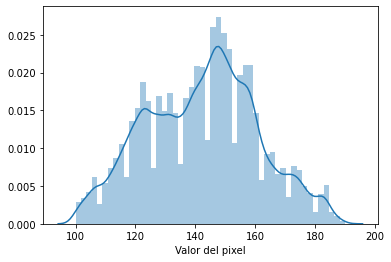

In [11]:
# Histograma de la imagen derecha
sns.distplot(flatten_image_der, axlabel="Valor del pixel", norm_hist=False)

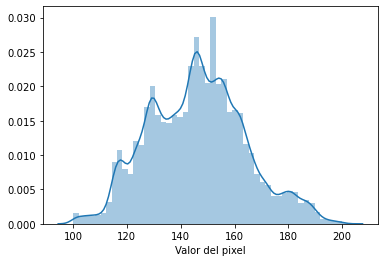

In [12]:
# Histograma de la imagen izquierda
sns.distplot(flatten_image_izq, axlabel="Valor del pixel", norm_hist=False)

In [13]:
# Obteniendo histograma de la imagen derecha
derecha_hist=np.histogram(flatten_image_der, bins=255, range=(0, 256))

In [14]:
# Obteniendo histograma de la imagen izquierda
izquierda_hist=np.histogram(flatten_image_izq, bins=255, range=(0, 256))

In [15]:
# Esta variable es para graficar nuestro histograma con el histograma generado pora la biblioteca seaborn
derecha_x=np.linspace(1,255,255)

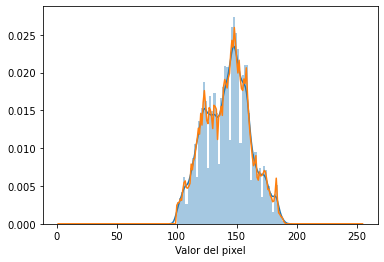

In [16]:
# Sobreponiendo nuestros histogramas
# Es posible observar que nuestro proceso es correcto utilizando diferentes métodos
sns.distplot(flatten_image_der, axlabel="Valor del pixel", norm_hist=False)
plt.plot(derecha_x,derecha_hist[0]/flatten_image_der.shape[0])

In [17]:
#Calculando el vector de probabilidad derecha
p_derecha = derecha_hist[0]/flatten_image_der.shape[0]

#Calculando el vector de probabilidad izquierda
p_izquierda = izquierda_hist[0]/flatten_image_der.shape[0]

### Media

In [18]:
# Calculando media

# Conforme a la ecuación propuesta en este trabajo
mean1=np.sum(derecha_x*p_derecha)
print(mean1)

# Utilizando el método mena de numpy
mean2=np.mean(flatten_image_der)
print(mean2)
    

142.2128430819163
142.21284308191633


### Desviación Estándar

In [19]:
# Desviación estándar

# Con método de numpy
std1=np.std(flatten_image_der, ddof=1)
print(std1)

18.684119084219883


### Asimetría

In [20]:
# Asimetría

# Con método de scipy
asime=scipy.stats.skew(flatten_image_der)
print(asime)

0.007178832515312044


### Curtosis

In [21]:
# Curtosis

# Con método de scipy
curt=scipy.stats.kurtosis(flatten_image_der, fisher=True)
print(curt)

-0.5506270072266615


### Energía

In [22]:
# Energía

energy = np.sum(np.power(p_derecha, 2))
print(energy)

0.015131382480202297


### Entropía

In [23]:
# Entropía

entropia = scipy.stats.entropy(p_derecha, base=2)
print(entropia)

6.209670228415834


### Moda

In [24]:
# Moda
moda=scipy.stats.mode(flatten_image_der)[0][0]
print(moda)

148.0


### Mediana

In [25]:
# Mediana
mediana=np.median(flatten_image_der)
print(mediana)

144.0


### Máximo

In [26]:
# Máximo
maximo=np.max(flatten_image_der)
print(maximo)

190.0


### Rango

In [27]:
#Rango

#mínmo
minimo=np.min(flatten_image_der)

#Rango
rango=maximo-minimo
print(rango)

90.0


## Descriptores de segundo orden

Ahora se describirá el proceso para hallar los descriptores estadísticos de segundo orden. Estos descriptores son obtenidos de una matriz de co-ocurrencia. Esta matriz representa el número de vecinos a 90 grados a distancia de un pixel que los pixeles de valor <em>i</em> tienen con lo valores <em>j</em>, donde <em>i</em> y <em>j</em> también representan la ubicación en el arreglo matricial.

Los descriptores que se obtendrán son:

<ol>
    <li>Segundo momento angular o energía: es mayor cuanto más suave es la textura.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/1_energia.png">
    <p></p>
    <li>Contraste: este descriptor tiene un valor alto cuando los valores alejados de la diagonal de la matriz son altos.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/2_contraste.png">
    <p></p>
    <li>Correlación: existen muchas formas de medir la correlación lineal entre dos variables, una de estas formas es utilizando el coeficiente de correlación lineal de Pearson. Este coeficiente es una "normalización" de la covarianza. Si este valor es cero no existe correlación lineal, si es 1, la correlación lienal es perfecta y si es -1, la correlación entre las variables es inversamente proporcional. La correlación que se busca medir aquí es la que existe entre los valores i con los valores j en los pares ordenados i,j.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/3_correlacion.png">
    <p></p>
    <li>Varianza: es un parámetro de dispersión de la distribución, mientras mayor su valor, mayor será la seperación de los datos respecto a los parámatros centrales.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/4_varianza.png">
    <p></p>
    <li>Entropía: toma valores bajos cuanto más suave es la textura. Es mayor cuanto más aleatoria es la matriz co-ocurrencia.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/5_entropia.png">
    <p></p>
    <li>Varianza de la diferencia: es otra definición alternativa de la varianza de los valores de la matriz de co-ocurrencia al reedefinirse la probabilidad de interés.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/6_var_dif.png">
    <p></p>
    <li>Homogeneidad: este parámetro aumenta inversamente al aumento del contraste. *Fe de erratas: en la ecuación de homogeneidad el término <em>1-j</em> debe ser <em>i-j</em> y debe estar elevado al cuadrado, en la práctica, este término hace que el contraste y la homogeneidad son inversamente proporcionales.</li>
    <img src="Ecuaciones_Descriptores/Segundo_orden/7_homogeneidad.png">
    <p></p>
</ol>

Donde <em>p(i,j)</em> es la probabilidad de que el valor iésimo y el valor jotaésimo con la dirección y distancia especificadas aparezcan en la imagen de ineterés. Para obtener esta matriz no usaremos el parámetro <em>normed</em> del método greycomatrix de la biblioteca skimage ya que primero eliminremos el elemeno (0,0) de la matriz de co-ocurrencia resultante para eliminar el "ruido" generado por contabilizar los pares 0,0. una vez realizado lo anterior se calculan las probabilidades.

Calculamos la matriz de co-ocurrencia con lo valores de probabilidad <em>p_coo</em>.

In [28]:
#Función para crear matriz de coocurrencia

def p_coo(A):
    
    # Convertimos nuestra imagen a valores uint8
    A = A.astype(np.uint8)
    
    # Obtenemos la matriz de co-ocurrencia sin normalizar (histograma no probabilístico)
    coo = greycomatrix(A, [1], [0])[:,:,0,0]
    
    # Mandamos a cero el elemento 0,0
    coo[0,0] = 0
    
    # Matriz probabilística o normalizada
    p_coo = coo/np.sum(coo)
    
    return p_coo

In [29]:
p_coo_der=p_coo(derecha)

In [30]:
# Comprobación
print("La suma de todos los elementos de p_coo_der debe ser 1.0: %0.1f"%np.sum(p_coo_der))

La suma de todos los elementos de p_coo_der debe ser 1.0: 1.0


### Segundo Momento Angular o Energía

In [31]:
energy2=np.sum(np.power(p_coo_der,2))
print(energy2)

0.00401354992187611


### Contraste

In [32]:
contrast=0
for i in range(p_coo_der.shape[0]):
    for j in range(p_coo_der.shape[1]):
        contrast+=np.power(i-j,2)*p_coo_der[i,j]        
print(contrast)

177.65002809186035


### Correlación

In [33]:
np.sum(p_coo_der[100,:])

0.002431701664442728

In [34]:
np.sum(p_coo_der, axis=1)[100]

0.002431701664442728

In [35]:
# Construyendo el vector de probabilidades p_x que recopila la probabilidad de aparición de los valores i
# los valores i son la posición de referencia que se utilizan para la construcción de los pares ordenados i,j
# en la matriz de co-ocurrencia.
p_x=np.sum(p_coo_der, axis=1)
p_x.shape

(256,)

In [36]:
# Construyendo el vector de probabilidades p_y que recopila la probabilidad de aparición de los valores j
# los valores j a la dirección 0 grados que se utilizan para la construcción de los pares ordenados i,j
# en la matriz de co-ocurrencia.
p_y=np.sum(p_coo_der, axis=0)
p_y.shape

(256,)

In [37]:
# Calculando la media de p_x
mhu_x = np.sum(np.linspace(0,255,256)*p_x)
mhu_x

141.55366423203878

In [38]:
# Calculando la media de p_y
mhu_y = np.sum(np.linspace(0,255,256)*p_y)
mhu_y

141.44593194746824

In [39]:
# Calculando desviación estándar de p_x
sigma_x = np.sqrt(np.sum(p_x*np.power(np.linspace(0,255,256)-mhu_x, 2)))
sigma_x

20.994863818333815

In [40]:
# Calculando desviación estándar de p_y
sigma_y = np.sqrt(np.sum(p_y*np.power(np.linspace(0,255,256)-mhu_y, 2)))
sigma_y

21.410819169183466

In [41]:
# Calculando el primer término de la covarianza
covar1 = 0
for i in range(p_coo_der.shape[0]):
    for j in range(p_coo_der.shape[1]):
        covar1 += i*j*p_coo_der[i,j]

In [42]:
# Calculando la correlacion
correlation = (covar1 - mhu_x*mhu_y)/(sigma_x*sigma_y)
correlation

0.8026044497465595

### Varianza

In [43]:
# Calculando mhu
mhu = (mhu_x+mhu_y)/2
mhu

141.4997980897535

In [44]:
# Calculando la varianza de p_coo
variance = 0
for i in range(p_coo_der.shape[0]):
    for j in range(p_coo_der.shape[1]):
        variance += np.power(i-mhu,2)*p_coo_der[i,j]
variance

440.78720831166714

### Entropía

In [45]:
# Claculando la entropía de p_coo
entropia2 = 0
for i in range(p_coo_der.shape[0]):
    for j in range(p_coo_der.shape[1]):
        # Para evitar errores agregamos está condición
        if p_coo_der[i,j] == 0:
            entropia2 += 0
        else:
            entropia2 += -p_coo_der[i,j]*np.log2(p_coo_der[i,j])
entropia2

8.576644599058055

### Varianza de la diferencia

In [46]:
# Construyendo el vector px_y

px_y = np.zeros((256,))

k=0
while k < 256:
    for i in range(p_coo_der.shape[0]):
        for j in range(p_coo_der.shape[1]):
            if k==np.abs(i-j):
                px_y[k]+=p_coo_der[i,j]
    k+=1

In [47]:
np.sum(px_y)

1.0000000000000002

In [48]:
# Calculando mhu_px_y
mhu_px_y=np.sum(np.linspace(0,255,256)*px_y)
mhu_px_y

2.207546175995505

In [49]:
# Calculando la varianza de la diferencia
var_dif = np.sum(np.power(np.linspace(0,255,256)-mhu_px_y,2)*px_y)
var_dif

172.776767972708

### Homogeneidad

In [50]:
homo = 0
for i in range(p_coo_der.shape[0]):
    for j in range(p_coo_der.shape[1]):
        homo += p_coo_der[i,j]/(1+np.power(i-j,2))

In [51]:
homo

0.629388330138782

## Comparando resultados con biblioteca propuesta

In [52]:
# Importando la biblioteca propuesta
import caracterizador

In [53]:
# Instanciando la biblioteca
caract=caracterizador.caracterizador(derecha)

In [54]:
# Obteniendo vector de características
vector_der = caract.prueba()

In [55]:
vector_der

array([[ 1.42212843e+02,  1.86841191e+01,  7.17883252e-03,
        -5.50627007e-01,  1.51313825e-02,  6.20967023e+00,
         1.48000000e+02,  1.44000000e+02,  1.90000000e+02,
         9.00000000e+01,  4.01354992e-03,  1.77650028e+02,
         8.02604450e-01,  4.40787208e+02,  8.57664460e+00,
         1.72776768e+02,  6.29388330e-01]])

In [56]:
# Recopilando los descriptores calculados en esta libreta
list_des=[mean1, std1, asime, curt, energy, entropia, moda, mediana, maximo, rango, energy2, contrast, correlation, 
          variance, entropia2, var_dif, homo]

In [62]:
list_des

[142.2128430819163,
 18.684119084219883,
 0.007178832515312044,
 -0.5506270072266615,
 0.015131382480202297,
 6.209670228415834,
 148.0,
 144.0,
 190.0,
 90.0,
 0.00401354992187611,
 177.65002809186035,
 0.8026044497465595,
 440.78720831166714,
 8.576644599058055,
 172.776767972708,
 0.629388330138782]

In [59]:
# Realizando análisis de la biblioteca propuesta
errores = 0
for i in range(len(list_des)):
    if vector_der[0,i] == list_des[i]:
        print("IMPLEMENTACIÓN CORRECTA")
        print("Descriptor "+str(i+1)+" biblioteca propuesta: "+str(vector_der[0,i]))
        print("Descriptor "+str(i+1)+" calculado en esta libreta: "+str(list_des[i]))
        print()
    else:
        print("Para el descriptor "+str(i+1)+" los resultadors no coinciden")
        print()
        errores+=1
        
if errores==0:
    print()
    print("TODOS LOS DESCRIPTORES COINCIDEN")
else:
    print()
    print("EXISTEN ERRORES")
    print("TOTAL DE ERRORES %d"%errores)
    

IMPLEMENTACIÓN CORRECTA
Descriptor 1 biblioteca propuesta: 142.2128430819163
Descriptor 1 calculado en esta libreta: 142.2128430819163

IMPLEMENTACIÓN CORRECTA
Descriptor 2 biblioteca propuesta: 18.684119084219883
Descriptor 2 calculado en esta libreta: 18.684119084219883

IMPLEMENTACIÓN CORRECTA
Descriptor 3 biblioteca propuesta: 0.007178832515312044
Descriptor 3 calculado en esta libreta: 0.007178832515312044

IMPLEMENTACIÓN CORRECTA
Descriptor 4 biblioteca propuesta: -0.5506270072266615
Descriptor 4 calculado en esta libreta: -0.5506270072266615

IMPLEMENTACIÓN CORRECTA
Descriptor 5 biblioteca propuesta: 0.015131382480202297
Descriptor 5 calculado en esta libreta: 0.015131382480202297

IMPLEMENTACIÓN CORRECTA
Descriptor 6 biblioteca propuesta: 6.209670228415834
Descriptor 6 calculado en esta libreta: 6.209670228415834

IMPLEMENTACIÓN CORRECTA
Descriptor 7 biblioteca propuesta: 148.0
Descriptor 7 calculado en esta libreta: 148.0

IMPLEMENTACIÓN CORRECTA
Descriptor 8 biblioteca propue